In [44]:
import pathlib
from pytorch_faster_rcnn_tutorial.utils import get_filenames_of_path

root = pathlib.Path(r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads')

inputs = get_filenames_of_path(root / 'input')
inputs.sort()


for idx, path in enumerate(inputs):
    old_name = path.stem  #file name
    
    old_extension = path.suffix
    dir = path.parent
    new_name = str(idx).zfill(3) + old_extension  #zfill adds o before
    path.rename(pathlib.Path(dir, new_name))

In [45]:
#napari annotator used
import pathlib
from pytorch_faster_rcnn_tutorial.visual import Annotator

from pytorch_faster_rcnn_tutorial.utils import get_filenames_of_path

dir = pathlib.Path(r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads')
print(dir, dir.glob('*'))
image_files = get_filenames_of_path(dir / 'input')

annotator = Annotator(image_ids=image_files)
annotator.napari()

C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads <generator object Path.glob at 0x00000183375D52E0>


In [3]:
#annotator.add_class(label='head', color='red')


In [4]:
#annotator.export(pathlib.Path(r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads\target'))


In [46]:
dir = pathlib.Path(r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads')
annotation_files = get_filenames_of_path(dir / 'target')

In [47]:
annotator = Annotator(image_ids=image_files,
                      annotation_ids=annotation_files)

In [48]:
import pathlib
import torch
from pytorch_faster_rcnn_tutorial.utils import get_filenames_of_path
import json
import numpy as np

root = pathlib.Path(r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads')

targets = get_filenames_of_path(root / 'target')
targets.sort()
#print(targets[0])
tar = open(targets[0])
#print(tar)
annotation = json.load(tar)
# torch .load throws file corrupt {error

print(f'keys:\n{annotation.keys()}\n')
print(f'labels:\n{np.array(annotation["labels"])}\n')
print(f'boxexs:\n{annotation["boxes"]}\n') 

keys:
dict_keys(['labels', 'boxes'])

labels:
['head' 'head']

boxexs:
[[149.4230248545763, 189.6273340746394, 443.5787079467999, 507.8941387317994], [522.3417050589254, 184.80510976165215, 789.1714503775545, 482.17560906253397]]



In [49]:

import os
os.chdir(r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial')

In [50]:
import pathlib

import albumentations as A
import numpy as np

from datasets import ObjectDetectionDataSet
from transformations import ComposeDouble, Clip, AlbumentationWrapper, FunctionWrapperDouble
from transformations import normalize_01
from utils import get_filenames_of_path

# %% root directory
root = pathlib.Path(r".\data\heads")

# %% input and target files
inputs = get_filenames_of_path(root / 'input')
targets = get_filenames_of_path(root / 'target')

inputs.sort()
targets.sort()

# %% mapping
mapping = {
    'head': 1,
}

# %% transformations and augmentations
transforms = ComposeDouble([
    Clip(),
    # AlbumentationWrapper(albumentation=A.HorizontalFlip(p=0.5)),
    # AlbumentationWrapper(albumentation=A.RandomScale(p=0.5, scale_limit=0.5)),
    # AlbuWrapper(albu=A.VerticalFlip(p=0.5)),
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# %% dataset
dataset = ObjectDetectionDataSet(inputs=inputs,
                                 targets=targets,
                                 transform=transforms,
                                 use_cache=False,
                                 convert_to_format=None,
                                 mapping=mapping)
print(dataset)

In [51]:
sample = dataset[1]
sample['x'].shape
sample

{'x': tensor([[[0.6118, 0.6118, 0.6078,  ..., 0.4941, 0.5059, 0.5216],
          [0.6157, 0.6118, 0.6039,  ..., 0.5176, 0.5255, 0.5294],
          [0.6196, 0.6157, 0.6078,  ..., 0.5529, 0.5529, 0.5529],
          ...,
          [0.9373, 0.9412, 0.9412,  ..., 0.4706, 0.4392, 0.4157],
          [0.9373, 0.9412, 0.9451,  ..., 0.5686, 0.4667, 0.3725],
          [0.9412, 0.9412, 0.9451,  ..., 0.5529, 0.5098, 0.5216]],
 
         [[0.5922, 0.5882, 0.5843,  ..., 0.4275, 0.4392, 0.4549],
          [0.5882, 0.5882, 0.5804,  ..., 0.4510, 0.4588, 0.4627],
          [0.5922, 0.5843, 0.5765,  ..., 0.4824, 0.4824, 0.4784],
          ...,
          [0.9176, 0.9216, 0.9294,  ..., 0.3373, 0.3020, 0.2902],
          [0.9098, 0.9137, 0.9137,  ..., 0.4745, 0.3608, 0.2667],
          [0.8980, 0.9059, 0.9098,  ..., 0.5216, 0.4431, 0.4235]],
 
         [[0.5059, 0.5020, 0.4902,  ..., 0.3490, 0.3686, 0.3922],
          [0.5137, 0.5020, 0.4941,  ..., 0.3725, 0.3804, 0.3922],
          [0.5216, 0.5098, 0.5020, 

In [52]:
# visualize dataset

color_mapping = {
    1: 'red',
}

from visual import DatasetViewer

datasetviewer = DatasetViewer(dataset, color_mapping)
datasetviewer.napari()

In [53]:
"""build the dataset for our head detector
The input to the model is expected to be a list of tensors, each of shape [C, H, W], one for each
image, and should be in 0-1 range. Different images can have different sizes."""

def collate_double(batch):
    """
    collate function for the ObjectDetectionDataSet.
    Only used by the dataloader.
    """
    x = [sample['x'] for sample in batch]
    y = [sample['y'] for sample in batch]
    x_name = [sample['x_name'] for sample in batch]
    y_name = [sample['y_name'] for sample in batch]
    return x, y, x_name, y_name


from torch.utils.data import DataLoader

dataloader = DataLoader(dataset=dataset,
                        batch_size=2,
                        shuffle=True,
                        num_workers=0,
                        collate_fn=collate_double)

In [54]:
batch = next(iter(dataloader))
batch #l3n =4

([tensor([[[0.3725, 0.3765, 0.3608,  ..., 0.7059, 0.7020, 0.6902],
           [0.3725, 0.3765, 0.3647,  ..., 0.6902, 0.6941, 0.6980],
           [0.3569, 0.3647, 0.3608,  ..., 0.6784, 0.6902, 0.7020],
           ...,
           [0.4235, 0.4196, 0.4078,  ..., 0.5843, 0.5843, 0.5725],
           [0.4078, 0.4275, 0.4235,  ..., 0.5725, 0.5843, 0.5804],
           [0.4118, 0.4314, 0.4275,  ..., 0.5686, 0.5882, 0.5804]],
  
          [[0.3686, 0.3725, 0.3569,  ..., 0.7176, 0.7137, 0.7020],
           [0.3686, 0.3725, 0.3608,  ..., 0.7020, 0.7059, 0.7098],
           [0.3529, 0.3608, 0.3569,  ..., 0.6902, 0.7020, 0.7137],
           ...,
           [0.3843, 0.3804, 0.3686,  ..., 0.5059, 0.5059, 0.4941],
           [0.3686, 0.3882, 0.3843,  ..., 0.4941, 0.5059, 0.5020],
           [0.3725, 0.3922, 0.3882,  ..., 0.4902, 0.5098, 0.5020]],
  
          [[0.3529, 0.3569, 0.3412,  ..., 0.6902, 0.6863, 0.6745],
           [0.3529, 0.3569, 0.3451,  ..., 0.6745, 0.6784, 0.6824],
           [0.3373, 0.

In [18]:
color_mapping = {
    1: 'red',
}

from visual import DatasetViewer

from torchvision.models.detection.transform import GeneralizedRCNNTransform

transform = GeneralizedRCNNTransform(min_size=1024,
                                     max_size=1024,
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])

datasetviewer = DatasetViewer(dataset, color_mapping, rccn_transform=transform)
datasetviewer.napari()

In [19]:
from utils import stats_dataset

stats = stats_dataset(dataset) #reads dimensions HW


from torchvision.models.detection.transform import GeneralizedRCNNTransform

transform = GeneralizedRCNNTransform(min_size=1024,
                                     max_size=1024,
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])

stats_transform = stats_dataset(dataset, transform)

In [20]:
print(stats['image_height'].max() ,
stats_transform['image_height'].max(),
stats['image_height'].min() ,
stats_transform['image_height'].min())

tensor(4160.) tensor(1024.) tensor(183.) tensor(576.)


In [21]:
from torchvision.models.detection.transform import GeneralizedRCNNTransform
from visual import AnchorViewer

transform = GeneralizedRCNNTransform(min_size=1024,
                                     max_size=1024,
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])

image = dataset[0]['x']  # ObjectDetectionDataSet
feature_map_size = (512, 32, 32)
anchorviewer = AnchorViewer(image=image,
                            rcnn_transform=transform,
                            feature_map_size=feature_map_size,
                            anchor_size=((128, 256, 512),),
                            aspect_ratios=((1.0,),)
                            )
anchorviewer.napari()


 For each anchor box, calculate which object’s bounding box has the highest overlap divided by non-overlap. This is called Intersection Over Union or IOU.
 
 
 Form thousands of candidate anchor boxes around the image
For each anchor box predict some offset from that box as a candidate box
Calculate a loss function based on the ground truth example
Calculate a probability that a given offset box overlaps with a real object
If that probability is greater than 0.5, factor the prediction into the loss function
By rewarding and penalizing predicted boxes slowly pull the model towards only localizing true objects

In [22]:
import torchvision.models as models
import torch
pretrained_model = models.resnet18(pretrained=True, progress=False)
out_channels = 512
backbone = torch.nn.Sequential(*list(pretrained_model.children())[:-2])
backbone.out_channels = out_channels
from torchsummary import summary
summary = summary(backbone, (3, 1024, 1024))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 512, 512]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 512, 512]        128
├─ReLU: 1-3                              [-1, 64, 512, 512]        --
├─MaxPool2d: 1-4                         [-1, 64, 256, 256]        --
├─Sequential: 1-5                        [-1, 64, 256, 256]        --
|    └─BasicBlock: 2-1                   [-1, 64, 256, 256]        --
|    |    └─Conv2d: 3-1                  [-1, 64, 256, 256]        36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 256, 256]        128
|    |    └─ReLU: 3-3                    [-1, 64, 256, 256]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 256, 256]        36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 256, 256]        128
|    |    └─ReLU: 3-6                    [-1, 64, 256, 256]        --
|    └─BasicBlock: 2-2                   [-1, 64, 256, 256]        --
|

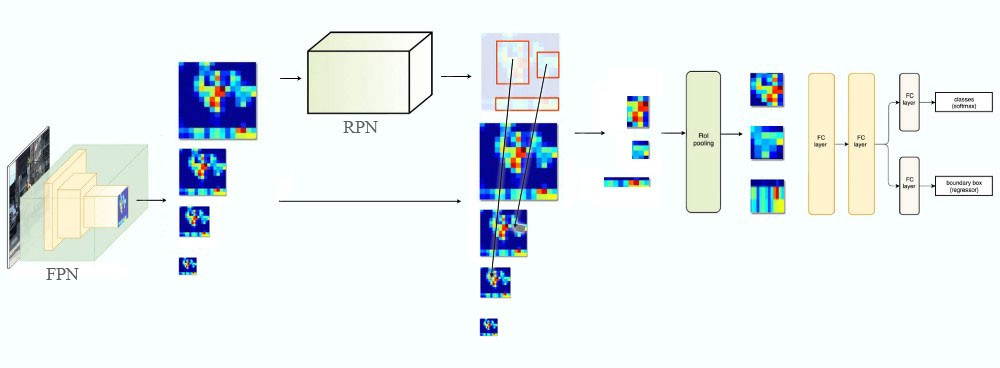

In [56]:
# Imports
import pathlib

import albumentations as A
import numpy as np
from torch.utils.data import DataLoader

from datasets import ObjectDetectionDataSet
from transformations import ComposeDouble, Clip, AlbumentationWrapper, FunctionWrapperDouble
from transformations import normalize_01
from utils import get_filenames_of_path, collate_double

# hyper-parameters
params = {'BATCH_SIZE': 2,
          'LR': 0.001,
          'PRECISION': 32,
          'CLASSES': 2,
          'SEED': 42,
          'PROJECT': 'Heads',
          'EXPERIMENT': 'heads',
          'MAXEPOCHS': 50,
          'BACKBONE': 'resnet34',
          'FPN': False,
          'ANCHOR_SIZE': ((32, 64, 128, 256, 512),),
          'ASPECT_RATIOS': ((0.5, 1.0, 2.0),),
          'MIN_SIZE': 1024,
          'MAX_SIZE': 1024,
          'IMG_MEAN': [0.485, 0.456, 0.406],
          'IMG_STD': [0.229, 0.224, 0.225],
          'IOU_THRESHOLD': 0.5
          }

# root directory
root = pathlib.Path(".\data\heads")

# input and target files
inputs = get_filenames_of_path(root / 'input')
targets = get_filenames_of_path(root / 'target')

inputs.sort()
targets.sort()

# mapping
mapping = {
    'head': 1,
}

# training transformations and augmentations
transforms_training = ComposeDouble([
    Clip(),
    AlbumentationWrapper(albumentation=A.HorizontalFlip(p=0.5)),
    AlbumentationWrapper(albumentation=A.RandomScale(p=0.5, scale_limit=0.5)),
    # AlbuWrapper(albu=A.VerticalFlip(p=0.5)),
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    Clip(),
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# test transformations
transforms_test = ComposeDouble([
    Clip(),
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
from pytorch_lightning import seed_everything

seed_everything(params['SEED'])

# training validation test split
inputs_train, inputs_valid, inputs_test = inputs[:12], inputs[12:16], inputs[16:]
targets_train, targets_valid, targets_test = targets[:12], targets[12:16], targets[16:]

# dataset training
dataset_train = ObjectDetectionDataSet(inputs=inputs_train,
                                       targets=targets_train,
                                       transform=transforms_training,
                                       use_cache=False,
                                       convert_to_format=None,
                                       mapping=mapping)

# dataset validation
dataset_valid = ObjectDetectionDataSet(inputs=inputs_valid,
                                       targets=targets_valid,
                                       transform=transforms_validation,
                                       use_cache=False,
                                       convert_to_format=None,
                                       mapping=mapping)

# dataset test
dataset_test = ObjectDetectionDataSet(inputs=inputs_test,
                                      targets=targets_test,
                                      transform=transforms_test,
                                      use_cache=False,
                                      convert_to_format=None,
                                      mapping=mapping)

# dataloader training
dataloader_train = DataLoader(dataset=dataset_train,
                              batch_size=params['BATCH_SIZE'],
                              shuffle=True,
                              num_workers=0,
                              collate_fn=collate_double)

# dataloader validation
dataloader_valid = DataLoader(dataset=dataset_valid,
                              batch_size=1,
                              shuffle=False,
                              num_workers=0,
                              collate_fn=collate_double)

# dataloader test
dataloader_test = DataLoader(dataset=dataset_test,
                             batch_size=1,
                             shuffle=False,
                             num_workers=0,
                             collate_fn=collate_double)
print("d")

Global seed set to 42


d


In [24]:

# neptune logger
from pytorch_lightning.loggers.neptune import NeptuneLogger


# api_key_neptune.py
#
# def get_api_key():
#     return 'your_super_long_API_token'




neptune_logger = NeptuneLogger(
    api_key="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzNWZjMzU3Mi1iYzQ2LTQ1MjgtYjM1OS1hY2RlYjdjOGQzNGEifQ==",
    project=f'rangarajtheevil/{params["PROJECT"]}', #/Heads
    name=params['EXPERIMENT'], #heads
    tags=["ressy"]
)
neptune_logger.experiment["training/hyper-parameters"] = params


https://app.neptune.ai/rangarajtheevil/Heads/e/HEAD-29
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [57]:

# model init
from faster_RCNN import get_faster_rcnn_resnet

model = get_faster_rcnn_resnet(num_classes=params['CLASSES'],
                              backbone_name=params['BACKBONE'],
                              anchor_size=params['ANCHOR_SIZE'],
                              aspect_ratios=params['ASPECT_RATIOS'],
                              fpn=params['FPN'],
                              min_size=params['MIN_SIZE'],
                              max_size=params['MAX_SIZE'])
model

ResNetBackbones.RESNET34


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(1024,), max_size=1024, mode='bilinear')
  )
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
      

In [33]:
# lightning init
from faster_RCNN import FasterRCNNLightning

task = FasterRCNNLightning(model=model, lr=params['LR'], iou_threshold=params['IOU_THRESHOLD'])
task

#iou > 7

FasterRCNNLightning(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(1024,), max_size=1024, mode='bilinear')
    )
    (backbone): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [34]:
# callbacks
from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping

checkpoint_callback = ModelCheckpoint(monitor='Validation_mAP', mode='max')
learningrate_callback = LearningRateMonitor(logging_interval='step', log_momentum=False)
early_stopping_callback = EarlyStopping(monitor='Validation_mAP', patience=50, mode='max')

# trainer init
from pytorch_lightning import Trainer

trainer = Trainer(gpus=1,
                  precision=params['PRECISION'],  # try 16 with enable_pl_optimizer=False
                  callbacks=[checkpoint_callback, learningrate_callback, early_stopping_callback],
                  default_root_dir="...\Experiments",  # where checkpoints are saved to
                  logger=neptune_logger,
                  log_every_n_steps=1,
                  num_sanity_val_steps=0)

C:\Users\drang\anaconda3\envs\rnn\lib\site-packages\pytorch_lightning\trainer\connectors\accelerator_connector.py:446: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [34]:
# %% start training
model.train()
trainer.max_epochs_ = params['MAXEPOCHS']
trainer.fit(task,
            train_dataloaders=dataloader_train,
            val_dataloaders=dataloader_valid)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | FasterRCNN | 50.4 M
-------------------------------------
50.4 M    Trainable params
0         Non-trainable params
50.4 M    Total params
201.736   Total estimated model params size (MB)


Training: 6it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Error occurred during asynchronous operation processing: Cannot delete training/model/checkpoints/epoch=35-step=216: Attribute does not exist


Validation: 0it [00:00, ?it/s]

Error occurred during asynchronous operation processing: Cannot upload file C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads\HEAD-28\checkpoints\epoch=41-step=252.ckpt: Path not found or is a not a file.
Error occurred during asynchronous operation processing: Cannot upload file C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads\HEAD-28\checkpoints\epoch=44-step=270.ckpt: Path not found or is a not a file.
Error occurred during asynchronous operation processing: Cannot upload file C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads\HEAD-28\checkpoints\epoch=50-step=306.ckpt: Path not found or is a not a file.
Error occurred during asynchronous operation processing: Cannot upload file C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [35]:

# start testing
trainer.test(ckpt_path='best', dataloaders=dataloader_test)

Restoring states from the checkpoint path at C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads\HEAD-28\checkpoints\epoch=62-step=378.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads\HEAD-28\checkpoints\epoch=62-step=378.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Test_AP_1           0.8106060606060607
        Test_mAP            0.8106060606060607
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'Test_mAP': 0.8106060606060607, 'Test_AP_1': 0.8106060606060607}]

In [58]:
# log model
"""import neptune


from utils import log_model_neptune

checkpoint_path = pathlib.Path(checkpoint_callback.best_model_path)
log_model_neptune(checkpoint_path=checkpoint_path,
                  save_directory=pathlib.Path.home(),
                  name='best_model.pt',
                  neptune_logger=neptune_logger)
                  """


model.load_state_dict(torch.load(r"C:\Users\drang\best_model.pt"))
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(1024,), max_size=1024, mode='bilinear')
  )
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
      

In [61]:
# imports
import ast
import pathlib

import neptune
import numpy as np
import torch
from torch.utils.data import DataLoader


from datasets import ObjectDetectionDatasetSingle, ObjectDetectionDataSet
from transformations import ComposeSingle, FunctionWrapperSingle, normalize_01, ComposeDouble, FunctionWrapperDouble
from utils import get_filenames_of_path, collate_single

# parameters
params = {'EXPERIMENT': 'Heads',
          'INPUT_DIR': r"C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads\test", # files to predict
          'PREDICTIONS_PATH': r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads\predictions', # where to save the predictions
          'MODEL_DIR': r'C:\Users\drang\best_model.pt', # load model from checkpoint
          'DOWNLOAD': False, # wether to download from neptune
          'DOWNLOAD_PATH': r'C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\.neptune\heads', # where to save the model
          'OWNER': 'rangarajtheevil',
          'PROJECT': 'Heads',
          }
parameters = {'BATCH_SIZE': 2,
          'LR': 0.001,
          'PRECISION': 32,
          'CLASSES': 2,
          'SEED': 42,
          'PROJECT': 'Heads',
          'EXPERIMENT': 'heads',
          'MAXEPOCHS': 15,
          'BACKBONE': 'resnet34',
          'FPN': False,
          'ANCHOR_SIZE': ((32, 64, 128, 256, 512),),
          'ASPECT_RATIOS': ((0.5, 1.0, 2.0),),
          'MIN_SIZE': 1024,
          'MAX_SIZE': 1024,
          'IMG_MEAN': [0.485, 0.456, 0.406],
          'IMG_STD': '[0.229, 0.224, 0.225]',
          'IOU_THRESHOLD': 0.5
          }

# input files
inputs = get_filenames_of_path(pathlib.Path(params['INPUT_DIR']))
inputs.sort()

# transformations
transforms = ComposeSingle([
    FunctionWrapperSingle(np.moveaxis, source=-1, destination=0),
    FunctionWrapperSingle(normalize_01)
])

# create dataset and dataloader
dataset = ObjectDetectionDatasetSingle(inputs=inputs,
                                       transform=transforms,
                                       use_cache=False,
                                       )

dataloader_prediction = DataLoader(dataset=dataset,
                                   batch_size=1,
                                   shuffle=False,
                                   num_workers=0,
                                   collate_fn=collate_single)

# import experiment from neptune

# view dataset
from visual import DatasetViewerSingle
from torchvision.models.detection.transform import GeneralizedRCNNTransform

transform = GeneralizedRCNNTransform(min_size=int(parameters['MIN_SIZE']),
                                     max_size=int(parameters['MAX_SIZE']),
                                     image_mean=parameters['IMG_MEAN'],
                                     image_std=parameters['IMG_STD'])


datasetviewer = DatasetViewerSingle(dataset, rccn_transform=None)
datasetviewer.napari()

# download model from neptune or load from checkpoint
if params['DOWNLOAD']:
    download_path = pathlib.Path(params['DOWNLOAD_PATH'])
    model_name = properties['checkpoint_name'] # logged when called log_model_neptune()
    if not (download_path / model_name).is_file():
        print("goin")
        experiment.download_artifact(path=model_name, destination_dir=download_path)  # download model

    model_state_dict = torch.load(download_path / model_name)
else:
    #print("goes")
    checkpoint = torch.load(params['MODEL_DIR'])
    #print(checkpoint.keys())
    #model_state_dict = checkpoint['hyper_parameters']['model'].state_dict()

# model init
#from faster_RCNN import get_faster_rcnn_resnet
"""model = get_faster_rcnn_resnet(num_classes=int(parameters['CLASSES']),
                              backbone_name=parameters['BACKBONE'],
                              anchor_size=parameters['ANCHOR_SIZE'],
                              aspect_ratios=parameters['ASPECT_RATIOS'],
                              fpn=parameters['FPN'],
                              min_size=parameters['MIN_SIZE'],
                              max_size=parameters['MAX_SIZE']
                              )"""

# load weights
#model.load_state_dict(checkpoint)


"model = get_faster_rcnn_resnet(num_classes=int(parameters['CLASSES']),\n                              backbone_name=parameters['BACKBONE'],\n                              anchor_size=parameters['ANCHOR_SIZE'],\n                              aspect_ratios=parameters['ASPECT_RATIOS'],\n                              fpn=parameters['FPN'],\n                              min_size=parameters['MIN_SIZE'],\n                              max_size=parameters['MAX_SIZE']\n                              )"

In [83]:
    #for flask app
    from skimage.io import imread
    img = imread(r"C:\Users\drang\Pictures\raj.JPG")
    if img.shape[-1] == 4:
            img = rgba2rgb(img)
    img_out = (img - np.min(img)) / np.ptp(img) #0-1 clip like
    model.eval()
    with torch.no_grad():
        imgy_out = np.transpose(img_out, (2,0,1))
        imgy_out = torch.from_numpy(imgy_out).type(torch.float32)
        
        print("ppppppppppppppppppp", imgy_out.shape)
        pred = model([imgy_out])  
        pred = {key: values.numpy() for key, values in pred[0].items()}
        

ppppppppppppppppppp torch.Size([3, 2856, 2166])


In [84]:
pred

{'boxes': array([[ 406.67297,  136.45958, 1270.7849 , 1123.1478 ],
        [ 684.1983 ,  235.74893, 1191.6272 ,  870.2687 ]], dtype=float32),
 'labels': array([1, 1], dtype=int64),
 'scores': array([0.9922517 , 0.08819473], dtype=float32)}

In [65]:
# inference
model.eval()
for sample in dataloader_prediction:
    x, x_name = sample
    print(x[0].shape)
    with torch.no_grad():
        pred = model(x)
        print(pred)
        pred = {key: value.numpy() for key, value in pred[0].items()}
        name = pathlib.Path(x_name[0])
        print()
        torch.save(pred, pathlib.Path(params['PREDICTIONS_PATH']) / name.with_suffix('.pt'))

torch.Size([3, 4624, 2032])
[{'boxes': tensor([[ 693.7078, 1616.5006, 1058.8169, 2179.8071],
        [1223.0750, 4583.7681, 2001.6517, 4623.9038]]), 'labels': tensor([1, 1]), 'scores': tensor([0.3804, 0.1094])}]

torch.Size([3, 2448, 3264])
[{'boxes': tensor([[2004.0688,  830.1784, 2476.4204, 1381.3347],
        [ 608.0507,  904.5889, 1477.8906, 1974.7883],
        [1325.4069, 1023.8124, 1738.8212, 1582.1046],
        [2951.1526,  827.3633, 3264.0000, 1258.5162],
        [ 683.0737,  979.8748, 1758.0913, 1689.3628],
        [ 597.1307, 1059.1313, 1164.8542, 1854.7266],
        [2821.8911,  746.3279, 3145.4500, 1319.6353],
        [2119.1550,  832.0587, 2421.3542, 1245.3341],
        [ 805.7841,  958.9735, 1313.8665, 1326.7555]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9869, 0.9629, 0.9475, 0.7775, 0.4635, 0.4226, 0.0996, 0.0611, 0.0570])}]

torch.Size([3, 2448, 3264])
[{'boxes': tensor([[ 664.4258, 1071.1982, 1176.9835, 1691.7917],
        [2570.4919,  969.1

In [ ]:
Stop()

In [21]:
import torch
pred = torch.load(r"C:\Users\drang\Downloads\PyTorch-Object-Detection-Faster-RCNN-Tutorial\pytorch_faster_rcnn_tutorial\data\heads\predictions\chloe.pt")
pred['boxes']=pred['boxes'].squeeze()
pred

{'boxes': array([[606.7937  ,  57.937008, 845.79224 , 339.0523  ],
        [410.5072  ,  51.783905, 656.876   , 316.1897  ],
        [416.78256 ,  42.00315 , 866.07306 , 328.6423  ]], dtype=float32),
 'labels': array([1, 1, 1], dtype=int64),
 'scores': array([0.987318  , 0.98337007, 0.80135643], dtype=float32)}

In [77]:
#for selection of score >.50 of bounding boxes
aallll = []
L = {}
c = 0
for i, j in pred.items():
    
    if i == "scores":
        print(len(j))
        for k in range(len(j)):
            if j[k]>0.5000:
                
                L[c]=j[k]
                 
                c+=1
            else:
                c+=1
for i, j in pred.items():
        if i == "boxes":
            print(L.items())
            aallll =  np.array(j[:len(L.keys())])
print(aallll)

2
dict_items([(0, 0.9922517)])
[[ 406.67297  136.45958 1270.7849  1123.1478 ]]


In [78]:
print(pred["scores"])
list(aallll[0])

[0.9922517  0.08819473]


[406.67297, 136.45958, 1270.7849, 1123.1478]

In [11]:
import torch
import torchvision
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes

tensor([[ 406,  136, 1270, 1123]], dtype=torch.int32)
<PIL.Image.Image image mode=RGB size=2166x2856 at 0x1836F2516A0>


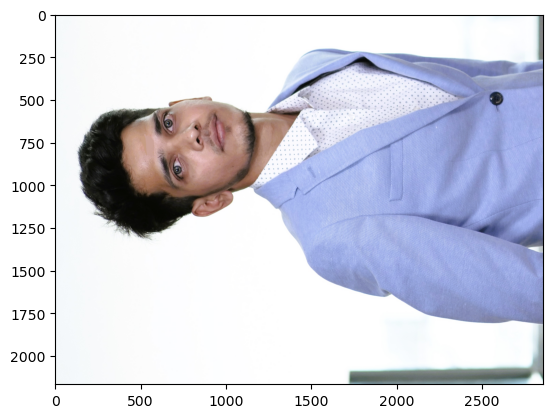

In [80]:
img = read_image(r"C:\Users\drang\Pictures\raj.JPG")
plt.imshow(np.transpose(img.numpy(),(2,1,0)))
#img = torchvision.transforms.ToPILImage()(img)
bbox = torch.tensor(aallll, dtype=torch.int)
print(bbox)
img=draw_bounding_boxes(img, bbox, width=3, colors=(255,255,0))
img = torchvision.transforms.ToPILImage()(img)
img.show()
print(img)

In [96]:
    from PIL import Image, ImageDraw
    boxes = aallll
    imge = Image.fromarray(img)
    for i in range(len(boxes)):
            ImageDraw.Draw(imge).rectangle(list(boxes[i]), width=5, outline ="red")
    imge.save("withbox1.jpg")
        

In [89]:
pwd

'C:\\Users\\drang\\Downloads\\PyTorch-Object-Detection-Faster-RCNN-Tutorial\\pytorch_faster_rcnn_tutorial'

In [ ]:
mport matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
  
x = np.array(Image.open('geek.png'), dtype=np.uint8)
plt.imshow(x)
  
# Create figure and axes
fig, ax = plt.subplots(1)
  
# Display the image
ax.imshow(x)
  
# Create a Rectangle patch
rect = patches.Rectangle((50, 100), 40, 30, linewidth=1,
                         edgecolor='r', facecolor="g")
  
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [72]:
# create prediction dataset
predictions = get_filenames_of_path(pathlib.Path(params['PREDICTIONS_PATH']))
predictions.sort()

transforms_prediction = ComposeDouble([
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

dataset_prediction = ObjectDetectionDataSet(inputs=inputs,
                                            targets=predictions,
                                            transform=transforms_prediction,
                                            use_cache=False)

#for 


# visualize predictions
from visual import DatasetViewer

color_mapping = {
    1: 'red',
}

datasetviewer_prediction = DatasetViewer(dataset_prediction, color_mapping)
datasetviewer_prediction.napari()

In [ ]:
backbone_name: ResNetBackbones
    #function annotations ->
# problem with enum in backbone_name class in two instance
first create an environment within pl neptune